<a href="https://colab.research.google.com/github/Sviatoslavzz/vacancies_parser/blob/develop/vacancies_pars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Выполнение проекта - скрапинг рекрутенговых сайтов для анализа требований к навыкам по вакансиям "Аналитик данных"

### Импорт библиотек и общие функции

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
# заголовки для запроса сайтов
headers = {
    'User-Agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.0 Safari/605.1.15'),
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language': 'ru',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'DNT': '1'
}

In [ ]:
def find_key(text, key_words):
  """
  функция поиска слова, возвращает да, нет или ошибку

  :param text: текст вакансии, key_words: ключевые слова для поиска
  :return: 'yes' / 'no' / 'error'
  """
  if text != 'error':
    result = 'no'
    for key in key_words:
      if key in text:
        result = 'yes'
        break
    return result
  else:
    return 'error'

In [ ]:
def get_text_from_link(link, block, attrs):
  """
    функция подключения к ресурсу, возвращает текст вакансии или ошибку

    :param link: ссылка на ресурс, block: тип блока с информацией, attrs: атрибуты блока с информацией
    :return: text if found / 'error' if not found
  """
  try:
    result = requests.get(url=link, headers=headers)
    soup = BeautifulSoup(result.content, 'lxml')
    try:
      text = soup.find(block, attrs = attrs).get_text().lower()
    except:
      text = 'error'
  except:
    text = 'error'
  return text

##### ключевые слова для анализа текста вакансий

In [ ]:
# Аналитические способности
analyt_s_list = ['аналитический склад ума', 'аналитика данных', 'аналитические способности',
                 'анализировать', 'анализ', 'аналитические']
# Языки программирования
progr_lang_list = ['python', 'c++', 'язык программирования', 'программир', 'код',
                   'pandas', 'seaborn', 'matplotlib']
# базы данных SQL
bd_list = ['sql']
# excel
xlsx_list = ['xlsx', 'excel', 'microsoft excel']
# визуализация данных
vis_list = ['tableau', 'power bi', 'bi', 'визуализац', 'power point', 'visme', 'infogram',
            'datapine', 'whatagraph', 'sisense', 'apache superset']
# Мат стат
math_list = ['математ', 'статист']
# теория вер
var_list = ['вероятност']
# отчеты
report_list = ['отчет', 'отчёт']
# критическое мышление
crit_list = ['критическ']
# английский язык
engl_list = ['английск', 'english']

### Скрапинг и анализ вакансий hh.ru

In [ ]:
full_list = []
vac_dict = dict.fromkeys(['title', 'link', 'salary', 'company', 'company_link'], 0)

for page in range(0, 31):
  link = f'https://spb.hh.ru/search/vacancy?L_save_area=true&text=аналитик+данных&search_field=name&area=113&currency_code=RUR&order_by=relevance&search_period=0&items_on_page=20&page={page}'
  result = requests.get(url=link, headers=headers)
  soup = BeautifulSoup(result.content, 'lxml')
  for i in soup.find_all('div', attrs = {'class' : 'vacancy-serp-item-body__main-info'}):
    vac_dict['link'] = (f"{i.find('a', attrs = {'class' : 'serp-item__title'}).attrs['href'].split('?')[0]}")
    vac_dict['title'] = (f"{i.find('a', attrs = {'class' : 'serp-item__title'}).get_text()}")
    try:
      vac_dict['salary'] = (f"{i.find('span', attrs = {'data-qa': 'vacancy-serp__vacancy-compensation'}).get_text()}")
    except:
      vac_dict['salary'] = ("none")
    vac_dict['company_link'] = (f"https://spb.hh.ru{i.find('a', attrs = {'data-qa': 'vacancy-serp__vacancy-employer'}).attrs['href'].split('?')[0]}")
    try:
      vac_dict['company'] = (f"{i.find('a', attrs = {'data-qa': 'vacancy-serp__vacancy-employer'}).get_text()}")
    except:
      vac_dict['company'] = ("none")
    full_list.append(vac_dict.copy())
  time.sleep(2)

In [ ]:
df = pd.DataFrame(full_list)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         620 non-null    object
 1   link          620 non-null    object
 2   salary        620 non-null    object
 3   company       620 non-null    object
 4   company_link  620 non-null    object
dtypes: object(5)
memory usage: 24.3+ KB


In [ ]:
df.head()

,title,link,salary,company,company_link
0,Senior System Analyst (Исследование данных и A...,https://spb.hh.ru/vacancy/87616663,none,Сбер. IT,https://spb.hh.ru/employer/3529
1,Аналитик данных,https://spb.hh.ru/vacancy/88380417,60 000 – 65 000 ₽,Минимакс,https://spb.hh.ru/employer/37476
2,Аналитик данных,https://spb.hh.ru/vacancy/88926013,none,"Иннотех, Группа компаний",https://spb.hh.ru/employer/4649269
3,Аналитик данных,https://spb.hh.ru/vacancy/87613889,none,HRLink,https://spb.hh.ru/employer/4821747
4,Аналитик данных,https://spb.hh.ru/vacancy/88922290,none,Банки.ру,https://spb.hh.ru/employer/72986


In [ ]:
for i in df[df.link == 'https://adsrv.hh.ru/click'].index:
  df.drop(index = i, inplace = True)

In [ ]:
df.link.nunique()

620

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_un = df.drop_duplicates()

In [ ]:
df_un.reset_index(inplace=True)
df_un.drop(columns='index', inplace=True)

In [ ]:
df_un['analytics_skill'] = ""
df_un['programming'] = ""
df_un['sql'] = ""
df_un['excel'] = ""
df_un['visualisation'] = ""
df_un['math_stat'] = ""
df_un['variations'] = ""
df_un['reports'] = ""
df_un['critical_thinking'] = ""
df_un['english'] = ""

In [ ]:
# обход всех уникальных ссылок и парсинг ключевых слов в вакансиях
block = 'div'
attrs = {'data-qa': 'vacancy-description'}

for link in df_un.link:
  text = get_text_from_link(link, block, attrs)
  index = df_un[df_un.link == link].index

  # analytics_skill
  df_un.iloc[index[0]]['analytics_skill'] = find_key(text, analyt_s_list)

  # programming
  df_un.iloc[index[0]]['programming'] = find_key(text, progr_lang_list)

  # sql
  df_un.iloc[index[0]]['sql'] = find_key(text, bd_list)

  # excel
  df_un.iloc[index[0]]['excel'] = find_key(text, xlsx_list)

  # visualisation
  df_un.iloc[index[0]]['visualisation'] = find_key(text, vis_list)

  # math_stat
  df_un.iloc[index[0]]['math_stat'] = find_key(text, math_list)

  # variations
  df_un.iloc[index[0]]['variations'] = find_key(text, var_list)

  # reports
  df_un.iloc[index[0]]['reports'] = find_key(text, report_list)

  # critical_thinking
  df_un.iloc[index[0]]['critical_thinking'] = find_key(text, crit_list)

  # english
  df_un.iloc[index[0]]['english'] = find_key(text, engl_list)

  time.sleep(1)

####Работа с выгруженными данными

In [ ]:
df_un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              620 non-null    object
 1   link               620 non-null    object
 2   salary             620 non-null    object
 3   company            620 non-null    object
 4   company_link       620 non-null    object
 5   analytics_skill    620 non-null    object
 6   programming        620 non-null    object
 7   sql                620 non-null    object
 8   excel              620 non-null    object
 9   visualisation      620 non-null    object
 10  math_stat          620 non-null    object
 11  variations         620 non-null    object
 12  reports            620 non-null    object
 13  critical_thinking  620 non-null    object
 14  english            620 non-null    object
dtypes: object(15)
memory usage: 72.8+ KB


In [ ]:
df_un.head(3)

,title,link,salary,company,company_link,analytics_skill,programming,sql,excel,visualisation,math_stat,variations,reports,critical_thinking,english
0,Senior System Analyst (Исследование данных и A...,https://spb.hh.ru/vacancy/87616663,none,Сбер. IT,https://spb.hh.ru/employer/3529,yes,no,yes,no,yes,no,no,no,no,yes
1,Аналитик данных,https://spb.hh.ru/vacancy/88380417,60 000 – 65 000 ₽,Минимакс,https://spb.hh.ru/employer/37476,yes,no,no,yes,no,no,no,yes,no,no
2,Аналитик данных,https://spb.hh.ru/vacancy/88926013,none,"Иннотех, Группа компаний",https://spb.hh.ru/employer/4649269,yes,no,yes,no,no,no,no,no,no,no


In [ ]:
df_un.to_excel("hh_ru_data.xlsx")

In [ ]:
df_un.count()

title                620
link                 620
salary               620
company              620
company_link         620
analytics_skill      620
programming          620
sql                  620
excel                620
visualisation        620
math_stat            620
variations           620
reports              620
critical_thinking    620
english              620
dtype: int64

In [ ]:
df_hh_res = pd.DataFrame.from_dict({
    'skills': ['analytics_skill', 'programming', 'sql', 'excel', 'visualisation',
               'math_stat', 'variations', 'reports', 'critical_thinking', 'english'],
    'yes_count': 0,
    'no_count': 0
})

In [ ]:
for skill in df_hh_res.skills:
  index = df_hh_res[df_hh_res.skills == skill].index
  df_hh_res.loc[index[0], 'yes_count'] = df_un[df_un[skill] == 'yes'].count()[0]
  df_hh_res.loc[index[0], 'no_count'] = df_un[df_un[skill] == 'no'].count()[0]

In [ ]:
df_hh_res

,skills,yes_count,no_count
0,analytics_skill,512,104
1,programming,336,280
2,sql,477,139
3,excel,260,356
4,visualisation,381,235
5,math_stat,256,360
6,variations,38,578
7,reports,407,209
8,critical_thinking,11,605
9,english,70,546


In [ ]:
for skill in df_hh_res.skills:
  index = df_hh_res[df_hh_res.skills == skill].index
  if skill == 'analytics_skill':
    df_hh_res.loc[index[0], 'skills'] = 'Аналитические\nспособности'
  elif skill == 'programming':
    df_hh_res.loc[index[0], 'skills'] = 'Языки\nпрограмми-\nрования'
  elif skill == 'sql':
    df_hh_res.loc[index[0], 'skills'] = 'Базы данных,\nSQL'
  elif skill == 'excel':
    df_hh_res.loc[index[0], 'skills'] = 'Microsoft\nExcel'
  elif skill == 'visualisation':
    df_hh_res.loc[index[0], 'skills'] = 'Визуализация\nданных'
  elif skill == 'math_stat':
    df_hh_res.loc[index[0], 'skills'] = 'Математическая\nстатистика'
  elif skill == 'variations':
    df_hh_res.loc[index[0], 'skills'] = 'Теория\nвероятностей'
  elif skill == 'reports':
    df_hh_res.loc[index[0], 'skills'] = 'Составление\nотчетов'
  elif skill == 'critical_thinking':
    df_hh_res.loc[index[0], 'skills'] = 'Критическое\nмышление'
  elif skill == 'english':
    df_hh_res.loc[index[0], 'skills'] = 'Английский\nязык'

In [ ]:
df_hh_res

,skills,yes_count,no_count
0,Аналитические\nспособности,512,104
1,Языки\nпрограмми-\nрования,336,280
2,"Базы данных,\nSQL",477,139
3,Microsoft\nExcel,260,356
4,Визуализация\nданных,381,235
5,Математическая\nстатистика,256,360
6,Теория\nвероятностей,38,578
7,Составление\nотчетов,407,209
8,Критическое\nмышление,11,605
9,Английский\nязык,70,546


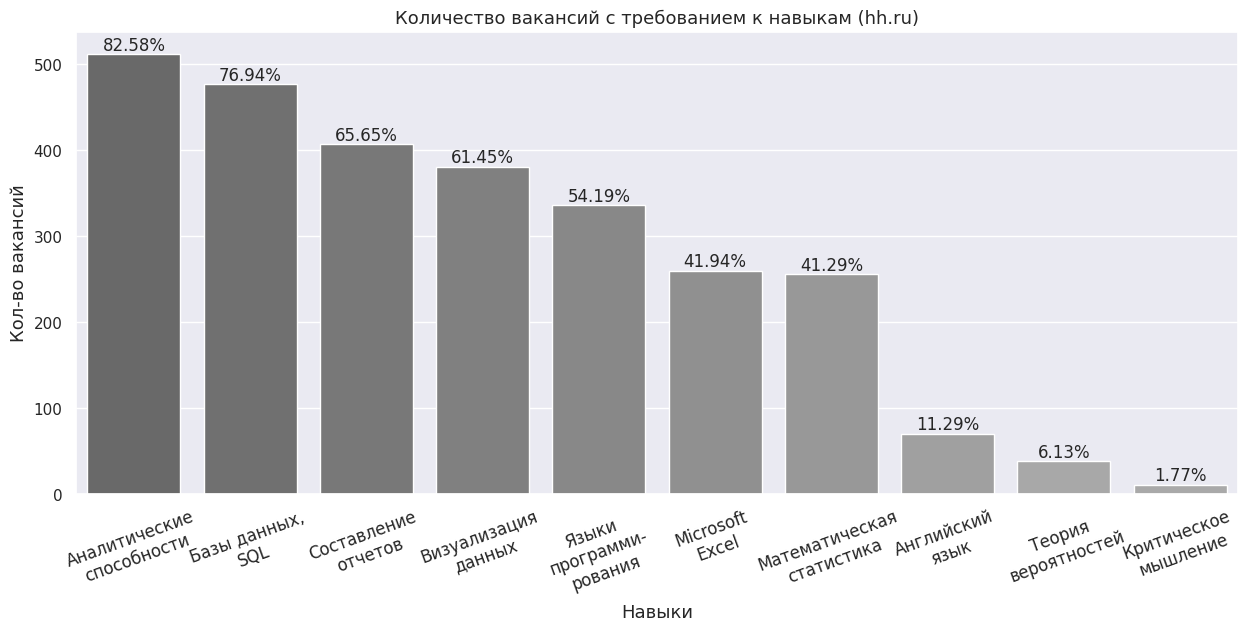

In [ ]:
fig = plt.figure(figsize=(15,6))

palette = sns.color_palette(['#696969', '#707070', '#787878', '#808080', '#888888', '#909090', '#989898', '#A0A0A0', '#A8A8A8', '#A9A9A9'])
sns.set()
ax = sns.barplot(y = 'yes_count',
            x = 'skills',
            data = df_hh_res.sort_values(by='yes_count', ascending = False),
            palette = palette
            )
plt.title('Количество вакансий с требованием к навыкам (hh.ru)', fontsize=13)
plt.xlabel('Навыки', fontsize=13)
plt.ylabel('Кол-во вакансий', fontsize=13)
plt.xticks(fontsize=12, rotation=20);
for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{:.2f}%'.format(y/df_un.title.count()*100), (x.mean(), y),ha='center', va='bottom', fontsize = 12)

###Скрапинг и анализ сайта SuperJob

In [ ]:
link = 'https://russia.superjob.ru/vakansii/analitik-dannyh.html?profession_only=1'

result = requests.get(url=link, headers=headers)

soup = BeautifulSoup(result.content, 'lxml')

In [ ]:
full_list = []
vac_dict = dict.fromkeys(['title', 'link', 'salary', 'company', 'company_link'], 0)

for elem in soup.find_all('div', attrs = {'class': '_3MhOV _1un6e'}):
  tmp = elem.find('span', attrs = {'class': '_1QOlM _2OLLx _102dm _2M1jg _2IT_8 _1BJoX inakc _2EuTH'})
  vac_dict['link'] = f"https://russia.superjob.ru{tmp.find('a').attrs['href']}" # link
  vac_dict['title'] = tmp.find('a').get_text() # name
  tmp = elem.find('div', attrs = {'class': 'f-test-text-company-item-salary'})
  vac_dict['salary'] = tmp.find('span').get_text() # salary
  tmp = elem.find('span', attrs = {'class': '_3nMqD f-test-text-vacancy-item-company-name _1jYKu _1BJoX inakc GQbw5 _30f1O'})
  vac_dict['company_link'] = f"https://russia.superjob.ru{tmp.find('a').attrs['href']}" # company link
  vac_dict['company'] = tmp.find('a').get_text() # company name
  full_list.append(vac_dict.copy())

In [ ]:
df = pd.DataFrame(full_list)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              9 non-null      object
 1   link               9 non-null      object
 2   salary             9 non-null      object
 3   company            9 non-null      object
 4   company_link       9 non-null      object
 5   analytics_skill    9 non-null      object
 6   programming        9 non-null      object
 7   sql                9 non-null      object
 8   excel              9 non-null      object
 9   visualisation      9 non-null      object
 10  math_stat          9 non-null      object
 11  variations         9 non-null      object
 12  reports            9 non-null      object
 13  critical_thinking  9 non-null      object
 14  english            9 non-null      object
dtypes: object(15)
memory usage: 1.2+ KB


In [ ]:
df.nunique()

title           9
link            9
salary          2
company         5
company_link    5
dtype: int64

In [ ]:
df['analytics_skill'] = ""
df['programming'] = ""
df['sql'] = ""
df['excel'] = ""
df['visualisation'] = ""
df['math_stat'] = ""
df['variations'] = ""
df['reports'] = ""
df['critical_thinking'] = ""
df['english'] = ""

In [ ]:
# поиск ключевых навыков в вакансиях
block = 'span'
attrs = {'class': '_39I1Z _1nolV _1BJoX inakc GQbw5 _30f1O'}

for link in df.link:
  text = get_text_from_link(link, block, attrs)
  index = df[df.link == link].index

  # analytics_skill
  df.iloc[index[0]]['analytics_skill'] = find_key(text, analyt_s_list)

  # programming
  df.iloc[index[0]]['programming'] = find_key(text, progr_lang_list)

  # sql
  df.iloc[index[0]]['sql'] = find_key(text, bd_list)

  # excel
  df.iloc[index[0]]['excel'] = find_key(text, xlsx_list)

  # visualisation
  df.iloc[index[0]]['visualisation'] = find_key(text, vis_list)

  # math_stat
  df.iloc[index[0]]['math_stat'] = find_key(text, math_list)

  # variations
  df.iloc[index[0]]['variations'] = find_key(text, var_list)

  # reports
  df.iloc[index[0]]['reports'] = find_key(text, report_list)

  # critical_thinking
  df.iloc[index[0]]['critical_thinking'] = find_key(text, crit_list)

  # english
  df.iloc[index[0]]['english'] = find_key(text, engl_list)

  time.sleep(2)

In [ ]:
df.to_excel('superjob_data.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              9 non-null      object
 1   link               9 non-null      object
 2   salary             9 non-null      object
 3   company            9 non-null      object
 4   company_link       9 non-null      object
 5   analytics_skill    9 non-null      object
 6   programming        9 non-null      object
 7   sql                9 non-null      object
 8   excel              9 non-null      object
 9   visualisation      9 non-null      object
 10  math_stat          9 non-null      object
 11  variations         9 non-null      object
 12  reports            9 non-null      object
 13  critical_thinking  9 non-null      object
 14  english            9 non-null      object
dtypes: object(15)
memory usage: 1.2+ KB


In [ ]:
df.head(3)

,title,link,salary,company,company_link,analytics_skill,programming,sql,excel,visualisation,math_stat,variations,reports,critical_thinking,english
0,Аналитик данных (Стрим дебетовые карты и счета),https://russia.superjob.ru/vakansii/analitik-d...,По договорённости,Банк ВТБ (ПАО),https://russia.superjob.ru/clients/bank-vtb-23...,yes,no,yes,yes,yes,yes,no,yes,no,no
1,Аналитик технической поддержки базы данных,https://russia.superjob.ru/vakansii/analitik-t...,По договорённости,Перекрёсток,https://russia.superjob.ru/clients/perekrestok...,no,no,no,no,no,no,no,yes,no,no
2,Аналитик данных,https://russia.superjob.ru/vakansii/analitik-d...,По договорённости,СКМ,https://russia.superjob.ru/clients/skm-4414163...,yes,yes,yes,yes,yes,yes,no,no,no,no


In [ ]:
df_sj_res = pd.DataFrame.from_dict({
    'skills': ['analytics_skill', 'programming', 'sql', 'excel', 'visualisation',
               'math_stat', 'variations', 'reports', 'critical_thinking', 'english'],
    'yes_count': 0,
    'no_count': 0
})

In [ ]:
for skill in df_sj_res.skills:
  index = df_sj_res[df_sj_res.skills == skill].index
  df_sj_res.loc[index[0], 'yes_count'] = df[df[skill] == 'yes'].count()[0]
  df_sj_res.loc[index[0], 'no_count'] = df[df[skill] == 'no'].count()[0]

In [ ]:
for skill in df_sj_res.skills:
  index = df_sj_res[df_sj_res.skills == skill].index
  if skill == 'analytics_skill':
    df_sj_res.loc[index[0], 'skills'] = 'Аналитические\nспособности'
  elif skill == 'programming':
    df_sj_res.loc[index[0], 'skills'] = 'Языки\nпрограмми-\nрования'
  elif skill == 'sql':
    df_sj_res.loc[index[0], 'skills'] = 'Базы данных,\nSQL'
  elif skill == 'excel':
    df_sj_res.loc[index[0], 'skills'] = 'Microsoft\nExcel'
  elif skill == 'visualisation':
    df_sj_res.loc[index[0], 'skills'] = 'Визуализация\nданных'
  elif skill == 'math_stat':
    df_sj_res.loc[index[0], 'skills'] = 'Математическая\nстатистика'
  elif skill == 'variations':
    df_sj_res.loc[index[0], 'skills'] = 'Теория\nвероятностей'
  elif skill == 'reports':
    df_sj_res.loc[index[0], 'skills'] = 'Составление\nотчетов'
  elif skill == 'critical_thinking':
    df_sj_res.loc[index[0], 'skills'] = 'Критическое\nмышление'
  elif skill == 'english':
    df_sj_res.loc[index[0], 'skills'] = 'Английский\nязык'

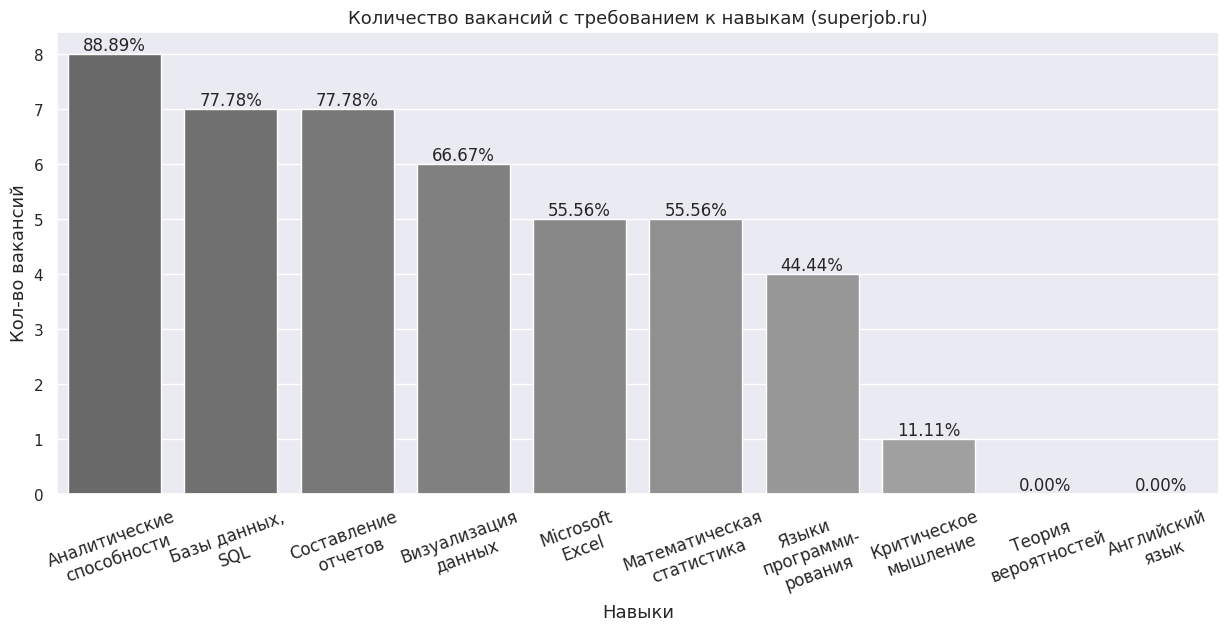

In [ ]:
fig = plt.figure(figsize=(15,6))

palette = sns.color_palette(['#696969', '#707070', '#787878', '#808080', '#888888', '#909090', '#989898', '#A0A0A0', '#A8A8A8', '#A9A9A9'])
sns.set()
ax = sns.barplot(y = 'yes_count',
            x = 'skills',
            data = df_sj_res.sort_values(by='yes_count', ascending = False),
            palette = palette
            )
plt.title('Количество вакансий с требованием к навыкам (superjob.ru)', fontsize=13)
plt.xlabel('Навыки', fontsize=13)
plt.ylabel('Кол-во вакансий', fontsize=13)
plt.xticks(fontsize=12, rotation=20);
for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{:.2f}%'.format(y/df.title.count()*100), (x.mean(), y),ha='center', va='bottom', fontsize = 12)

### Скрапинг и анализ Хабр Карьера

In [ ]:
full_list = []
vac_dict = dict.fromkeys(['title', 'link', 'salary', 'company', 'company_link'], 0)

for page in range(0, 36):
  link = f'https://career.habr.com/vacancies?page={page}&q=аналитик+данных&type=all'
  result = requests.get(url=link, headers=headers)
  soup = BeautifulSoup(result.content, 'lxml')

  for i in soup.find_all('div', attrs = {'class': 'vacancy-card__info'}):
    vac_dict['link'] = (f"https://career.habr.com{i.find('a', attrs = {'class': 'vacancy-card__title-link'}).attrs['href']}")
    try:
      vac_dict['title'] = i.find('a', attrs = {'class': 'vacancy-card__title-link'}).get_text()
    except:
      vac_dict['title'] = 'error'
    try:
      vac_dict['salary'] = i.find('div', attrs = {'class': 'basic-salary'}).get_text()
    except:
      vac_dict['salary'] = "none"
    vac_dict['company_link'] = f"https://career.habr.com{i.find('div', attrs = {'class': 'vacancy-card__company-title'}).find('a').attrs['href']}"
    try:
      vac_dict['company'] = i.find('div', attrs = {'class': 'vacancy-card__company-title'}).find('a').get_text()
    except:
      vac_dict['company'] = "error"

    full_list.append(vac_dict.copy())

  time.sleep(2)

In [ ]:
df = pd.DataFrame(full_list)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# так как на сайте не реализовано сужение поиска строго по названию вакансии
# исключим лишние вакансии (которые не удовлетворяют любым названиям вакансий аналитика данных)
# для этого создадим список ключевых слов
da_list = [
    'аналитик данных',
    'исследователь данных',
    'data scientist',
    'инженер данных',
    'хранения данных',
    'хранение данных',
    'хранилища данных',
    'база данных',
    'базы данных',
    'баз данных',
    # 'системный аналитик',
    'кхд',
    'аналитик по данным',
    'аналитик по данным',
    'data analyst',
    'dwh',
    'bi',
    'data аналитик',
    'фулстек-аналитик',
    'фулстек аналитик',
    'web-анал',
    'web анал',
    'dba',
    'power query',
    'python аналитик',
    'аналитик субд',
    'аналитических систем',
    'асу тп',
    'data engineer',
    'fullstack аналитик',
    'сектора аналитики',
    'аналитик sql',
    'ml-аналитик',
    'аналитик в области информационных систем',
    'аналитик middle'
]

In [ ]:
df.reset_index(inplace = True)
df.drop(columns='index', inplace = True)

In [ ]:
list_of_index = []

for j in df.title:
  for i in da_list:
    if i in j.lower() and i not in list_of_index:
      list_of_index.append(df[df.title == j].index[0])
      break

set_ = set(list_of_index)
list_of_index = list(set_)

In [ ]:
df_r = df.iloc [list_of_index].copy()

In [ ]:
df_r.reset_index(inplace=True)
df_r.drop(columns='index', inplace=True)

In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         104 non-null    object
 1   link          104 non-null    object
 2   salary        104 non-null    object
 3   company       104 non-null    object
 4   company_link  104 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [ ]:
df_r.head(3)

,title,link,salary,company,company_link
0,Аналитик данных,https://career.habr.com/vacancies/1000130456,,Bell Integrator,https://career.habr.com/companies/bellintegrator
1,Стажер – аналитик данных,https://career.habr.com/vacancies/1000131113,,Банк России,https://career.habr.com/companies/cbr
2,Аналитик данных (ОРД),https://career.habr.com/vacancies/1000125228,,VK,https://career.habr.com/companies/vk


In [ ]:
df_r.to_excel('habr_data.xlsx')

In [ ]:
df_r['analytics_skill'] = ""
df_r['programming'] = ""
df_r['sql'] = ""
df_r['excel'] = ""
df_r['visualisation'] = ""
df_r['math_stat'] = ""
df_r['variations'] = ""
df_r['reports'] = ""
df_r['critical_thinking'] = ""
df_r['english'] = ""

In [ ]:
# обход всех уникальных ссылок и парсинг ключевых слов в вакансиях
block = 'div'
attrs = {'class': 'vacancy-description__text'}

for link in df_r.link:
  text = get_text_from_link(link, block, attrs)
  index = df_r[df_r.link == link].index

  # analytics_skill
  df_r.loc[index[0], 'analytics_skill'] = find_key(text, analyt_s_list)

  # programming
  df_r.loc[index[0], 'programming'] = find_key(text, progr_lang_list)

  # sql
  df_r.loc[index[0], 'sql'] = find_key(text, bd_list)

  # excel
  df_r.loc[index[0], 'excel'] = find_key(text, xlsx_list)

  # visualisation
  df_r.loc[index[0], 'visualisation'] = find_key(text, vis_list)

  # math_stat
  df_r.loc[index[0], 'math_stat'] = find_key(text, math_list)

  # variations
  df_r.loc[index[0], 'variations'] = find_key(text, var_list)

  # reports
  df_r.loc[index[0], 'reports'] = find_key(text, report_list)

  # critical_thinking
  df_r.loc[index[0], 'critical_thinking'] = find_key(text, crit_list)

  # english
  df_r.loc[index[0], 'english'] = find_key(text, engl_list)

  time.sleep(1)

In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              104 non-null    object
 1   link               104 non-null    object
 2   salary             104 non-null    object
 3   company            104 non-null    object
 4   company_link       104 non-null    object
 5   analytics_skill    104 non-null    object
 6   programming        104 non-null    object
 7   sql                104 non-null    object
 8   excel              104 non-null    object
 9   visualisation      104 non-null    object
 10  math_stat          104 non-null    object
 11  variations         104 non-null    object
 12  reports            104 non-null    object
 13  critical_thinking  104 non-null    object
 14  english            104 non-null    object
dtypes: object(15)
memory usage: 12.3+ KB


In [ ]:
df_r.head(3)

,title,link,salary,company,company_link,analytics_skill,programming,sql,excel,visualisation,math_stat,variations,reports,critical_thinking,english
0,Аналитик данных,https://career.habr.com/vacancies/1000130456,,Bell Integrator,https://career.habr.com/companies/bellintegrator,no,no,yes,yes,yes,no,no,no,no,no
1,Стажер – аналитик данных,https://career.habr.com/vacancies/1000131113,,Банк России,https://career.habr.com/companies/cbr,yes,yes,yes,no,no,no,no,no,no,no
2,Аналитик данных (ОРД),https://career.habr.com/vacancies/1000125228,,VK,https://career.habr.com/companies/vk,no,yes,yes,no,no,no,no,yes,no,no


In [ ]:
df_r.to_excel('habr_data.xlsx')

In [ ]:
df_habr_res = pd.DataFrame.from_dict({
    'skills': ['analytics_skill', 'programming', 'sql', 'excel', 'visualisation',
               'math_stat', 'variations', 'reports', 'critical_thinking', 'english'],
    'yes_count': 0,
    'no_count': 0
})

In [ ]:
for skill in df_habr_res.skills:
  index = df_habr_res[df_habr_res.skills == skill].index
  df_habr_res.loc[index[0], 'yes_count'] = df_r[df_r[skill] == 'yes'].count()[0]
  df_habr_res.loc[index[0], 'no_count'] = df_r[df_r[skill] == 'no'].count()[0]

In [ ]:
df_habr_res

,skills,yes_count,no_count
0,analytics_skill,70,34
1,programming,61,43
2,sql,86,18
3,excel,9,95
4,visualisation,40,64
5,math_stat,12,92
6,variations,2,102
7,reports,37,67
8,critical_thinking,2,102
9,english,30,74


In [ ]:
for skill in df_habr_res.skills:
  index = df_habr_res[df_habr_res.skills == skill].index
  if skill == 'analytics_skill':
    df_habr_res.loc[index[0], 'skills'] = 'Аналитические\nспособности'
  elif skill == 'programming':
    df_habr_res.loc[index[0], 'skills'] = 'Языки\nпрограмми-\nрования'
  elif skill == 'sql':
    df_habr_res.loc[index[0], 'skills'] = 'Базы данных,\nSQL'
  elif skill == 'excel':
    df_habr_res.loc[index[0], 'skills'] = 'Microsoft\nExcel'
  elif skill == 'visualisation':
    df_habr_res.loc[index[0], 'skills'] = 'Визуализация\nданных'
  elif skill == 'math_stat':
    df_habr_res.loc[index[0], 'skills'] = 'Математическая\nстатистика'
  elif skill == 'variations':
    df_habr_res.loc[index[0], 'skills'] = 'Теория\nвероятностей'
  elif skill == 'reports':
    df_habr_res.loc[index[0], 'skills'] = 'Составление\nотчетов'
  elif skill == 'critical_thinking':
    df_habr_res.loc[index[0], 'skills'] = 'Критическое\nмышление'
  elif skill == 'english':
    df_habr_res.loc[index[0], 'skills'] = 'Английский\nязык'

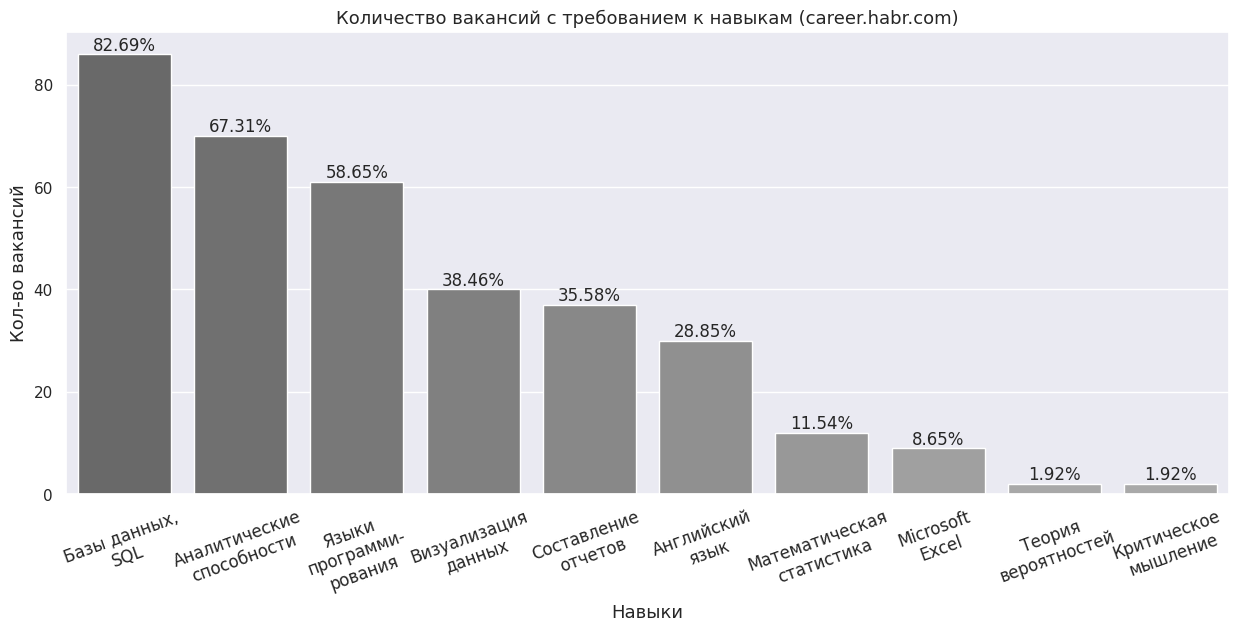

In [ ]:
fig = plt.figure(figsize=(15,6))

palette = sns.color_palette(['#696969', '#707070', '#787878', '#808080', '#888888', '#909090', '#989898', '#A0A0A0', '#A8A8A8', '#A9A9A9'])
sns.set()
ax = sns.barplot(y = 'yes_count',
            x = 'skills',
            data = df_habr_res.sort_values(by='yes_count', ascending = False),
            palette = palette
            )
plt.title('Количество вакансий с требованием к навыкам (career.habr.com)', fontsize=13)
plt.xlabel('Навыки', fontsize=13)
plt.ylabel('Кол-во вакансий', fontsize=13)
plt.xticks(fontsize=12, rotation=20);
for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{:.2f}%'.format(y/df_r.title.count()*100), (x.mean(), y),ha='center', va='bottom', fontsize = 12)

### Объединение собранных данных и вывод общей диаграммы

In [ ]:
df_1 = pd.read_excel('/content/hh_ru_data.xlsx')
df_2 = pd.read_excel('/content/habr_data.xlsx')
df_3 = pd.read_excel('/content/superjob_data.xlsx')

In [ ]:
df_final = pd.concat([df, df_1, df_2, df_3], ignore_index=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              762 non-null    object 
 1   link               762 non-null    object 
 2   salary             669 non-null    object 
 3   company            762 non-null    object 
 4   company_link       762 non-null    object 
 5   analytics_skill    762 non-null    object 
 6   programming        762 non-null    object 
 7   sql                762 non-null    object 
 8   excel              762 non-null    object 
 9   visualisation      762 non-null    object 
 10  math_stat          762 non-null    object 
 11  variations         762 non-null    object 
 12  reports            762 non-null    object 
 13  critical_thinking  762 non-null    object 
 14  english            762 non-null    object 
 15  Unnamed: 0         733 non-null    float64
dtypes: float64(1), object(15)


In [ ]:
df_result = pd.DataFrame.from_dict({
    'skills': ['analytics_skill', 'programming', 'sql', 'excel', 'visualisation',
               'math_stat', 'variations', 'reports', 'critical_thinking', 'english'],
    'yes_count': 0,
    'no_count': 0
})

In [ ]:
for skill in df_result.skills:
  index = df_result[df_result.skills == skill].index
  df_result.loc[index[0], 'yes_count'] = df_final[df_final[skill] == 'yes'].count()[0]
  df_result.loc[index[0], 'no_count'] = df_final[df_final[skill] == 'no'].count()[0]

In [ ]:
df_result

,skills,yes_count,no_count
0,analytics_skill,608,148
1,programming,405,351
2,sql,575,181
3,excel,276,480
4,visualisation,437,319
5,math_stat,279,477
6,variations,40,716
7,reports,464,292
8,critical_thinking,14,742
9,english,100,656


In [ ]:
for skill in df_result.skills:
  index = df_result[df_result.skills == skill].index
  if skill == 'analytics_skill':
    df_result.loc[index[0], 'skills'] = 'Аналитические\nспособности'
  elif skill == 'programming':
    df_result.loc[index[0], 'skills'] = 'Языки\nпрограмми-\nрования'
  elif skill == 'sql':
    df_result.loc[index[0], 'skills'] = 'Базы данных,\nSQL'
  elif skill == 'excel':
    df_result.loc[index[0], 'skills'] = 'Microsoft\nExcel'
  elif skill == 'visualisation':
    df_result.loc[index[0], 'skills'] = 'Визуализация\nданных'
  elif skill == 'math_stat':
    df_result.loc[index[0], 'skills'] = 'Математическая\nстатистика'
  elif skill == 'variations':
    df_result.loc[index[0], 'skills'] = 'Теория\nвероятностей'
  elif skill == 'reports':
    df_result.loc[index[0], 'skills'] = 'Составление\nотчетов'
  elif skill == 'critical_thinking':
    df_result.loc[index[0], 'skills'] = 'Критическое\nмышление'
  elif skill == 'english':
    df_result.loc[index[0], 'skills'] = 'Английский\nязык'

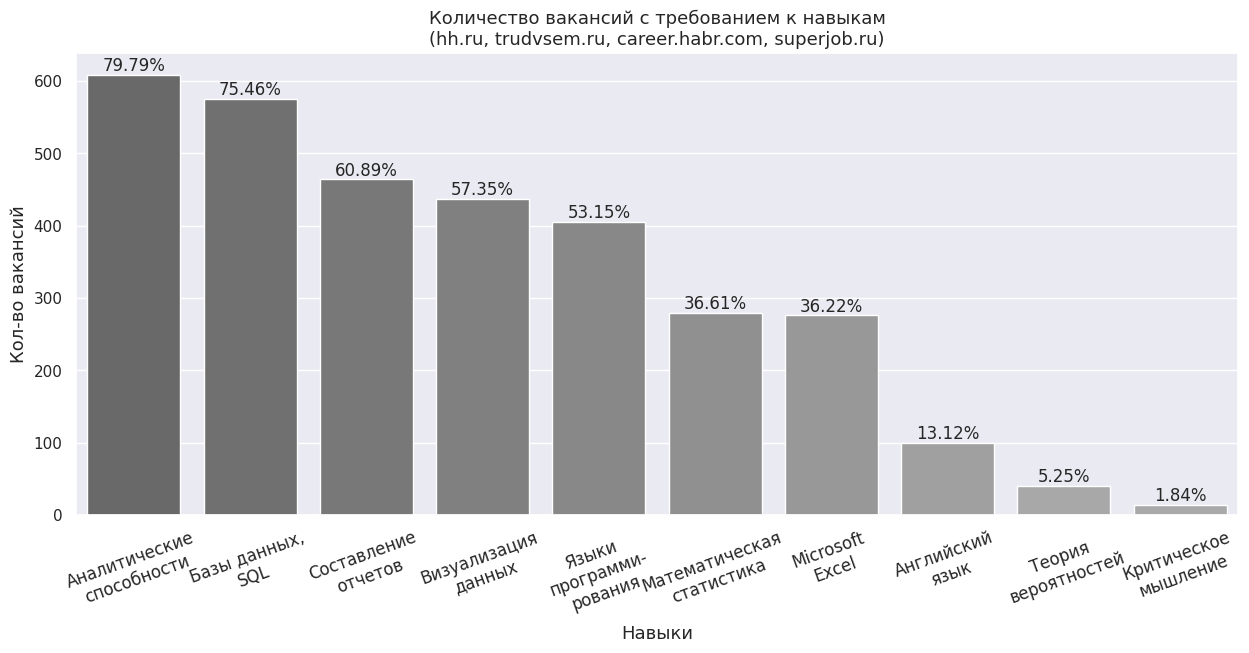

In [ ]:
fig = plt.figure(figsize=(15,6))

palette = sns.color_palette(['#696969', '#707070', '#787878', '#808080', '#888888', '#909090', '#989898', '#A0A0A0', '#A8A8A8', '#A9A9A9'])
sns.set()
ax = sns.barplot(y = 'yes_count',
            x = 'skills',
            data = df_result.sort_values(by='yes_count', ascending = False),
            palette = palette
            )
plt.title('Количество вакансий с требованием к навыкам\n(hh.ru, trudvsem.ru, career.habr.com, superjob.ru)', fontsize=13)
plt.xlabel('Навыки', fontsize=13)
plt.ylabel('Кол-во вакансий', fontsize=13)
plt.xticks(fontsize=12, rotation=20);
for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{:.2f}%'.format(y/df_final.title.count()*100), (x.mean(), y),ha='center', va='bottom', fontsize = 12)